In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import  tabulate
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('DS1_C5_S3_BazilHousing_Data_Hackathon.csv')

In [3]:
df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [4]:
#shape of the datset
df.shape

(10692, 13)

In [5]:
#column names
df.columns

Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa (R$)', 'rent amount (R$)',
       'property tax (R$)', 'fire insurance (R$)', 'total (R$)'],
      dtype='object')

In [6]:
#displaying the dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  int64 
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(10), object(3)
memory usage: 1.1+ MB


In [7]:
#displaying the datatypes
df.dtypes

city                   object
area                    int64
rooms                   int64
bathroom                int64
parking spaces          int64
floor                   int64
animal                 object
furniture              object
hoa (R$)                int64
rent amount (R$)        int64
property tax (R$)       int64
fire insurance (R$)     int64
total (R$)              int64
dtype: object

In [8]:
#checking null values in the column
df.isnull().sum()

city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64

In [9]:
def seperate_data_types(df):
    categorical=[]
    continous=[]
    for column in df.columns:
        if df[column].nunique() < 100:     
            categorical.append(column)           
        else:
            continous.append(column)
    return categorical,continous
categorical,continous=seperate_data_types(df)
from tabulate import tabulate 
table=[categorical,continous]
print(tabulate ({"Categorical":categorical,"Continous":continous},headers=['categorical','continous']))

categorical     continous
--------------  -------------------
city            area
rooms           hoa (R$)
bathroom        rent amount (R$)
parking spaces  property tax (R$)
floor           fire insurance (R$)
animal          total (R$)
furniture


In [10]:
def info_categorical(col):
    print(f"The number of unique values  in {col} is:{df[col].unique()}")
    print(f"mode of  {col} is:{df[col].mode()[0]}")
    print(f"The number of missing  values  in {col} is:{df[col].isnull().sum()}")

In [11]:
print(info_categorical('city'))

The number of unique values  in city is:['São Paulo' 'Porto Alegre' 'Rio de Janeiro' 'Campinas' 'Belo Horizonte']
mode of  city is:São Paulo
The number of missing  values  in city is:0
None


In [12]:
print(info_categorical('floor'))

The number of unique values  in floor is:[  7  20   6   2   1   0   4   3  10  11  24   9   8  17  18   5  13  15
  16  14  26  12  21  19  22  27  23  35  25  46  28  29 301  51  32]
mode of  floor is:0
The number of missing  values  in floor is:0
None


In [13]:
print(info_categorical('animal'))

The number of unique values  in animal is:['acept' 'not acept']
mode of  animal is:acept
The number of missing  values  in animal is:0
None


In [14]:
print(info_categorical('furniture'))

The number of unique values  in furniture is:['furnished' 'not furnished']
mode of  furniture is:not furnished
The number of missing  values  in furniture is:0
None


In [15]:
print(info_categorical('rooms'))

The number of unique values  in rooms is:[ 2  4  1  3  7  5  8  6 10 13  9]
mode of  rooms is:3
The number of missing  values  in rooms is:0
None


In [16]:
df.city.unique()

array(['São Paulo', 'Porto Alegre', 'Rio de Janeiro', 'Campinas',
       'Belo Horizonte'], dtype=object)

In [17]:
df.columns

Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa (R$)', 'rent amount (R$)',
       'property tax (R$)', 'fire insurance (R$)', 'total (R$)'],
      dtype='object')

In [18]:
#measures of dispersion for the numerical columns
df.describe()

,area,rooms,bathroom,parking spaces,floor,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
count,10692.000000,10692.000000,10692.000000,10692.000000,10692.000000,1.069200e+04,10692.000000,10692.000000,10692.000000,1.069200e+04
mean,149.217920,2.506079,2.236813,1.609147,5.067995,1.174022e+03,3896.247194,366.704358,53.300879,5.490487e+03
std,537.016942,1.171266,1.407198,1.589521,6.069050,1.559231e+04,3408.545518,3107.832321,47.768031,1.648473e+04
min,11.000000,1.000000,1.000000,0.000000,0.000000,0.000000e+00,450.000000,0.000000,3.000000,4.990000e+02
25%,56.000000,2.000000,1.000000,0.000000,1.000000,1.700000e+02,1530.000000,38.000000,21.000000,2.061750e+03
50%,90.000000,2.000000,2.000000,1.000000,3.000000,5.600000e+02,2661.000000,125.000000,36.000000,3.581500e+03
75%,182.000000,3.000000,3.000000,2.000000,8.000000,1.237500e+03,5000.000000,375.000000,68.000000,6.768000e+03
max,46335.000000,13.000000,10.000000,12.000000,301.000000,1.117000e+06,45000.000000,313700.000000,677.000000,1.120000e+06


In [19]:
df11 = df[(df['city'] != 'Rio de Janeiro') & (df['city'] != 'São Paulo')]

In [20]:
df11

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
11,Campinas,46,1,1,1,10,acept,not furnished,550,580,43,8,1181
15,Campinas,330,4,6,6,0,acept,furnished,680,8000,328,121,9129
21,Belo Horizonte,42,1,1,1,17,not acept,furnished,470,2690,172,36,3368
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10667,Belo Horizonte,75,2,1,1,3,not acept,not furnished,180,1250,0,17,1447
10673,Porto Alegre,220,3,2,2,15,acept,not furnished,842,2400,117,36,3395
10676,Porto Alegre,40,1,1,0,1,acept,not furnished,330,1200,159,18,1707
10682,Porto Alegre,160,3,2,3,4,acept,furnished,850,3300,220,49,4419


# univariate analysis

Belo Horizonte    1258
Porto Alegre      1193
Campinas           853
Name: city, dtype: int64


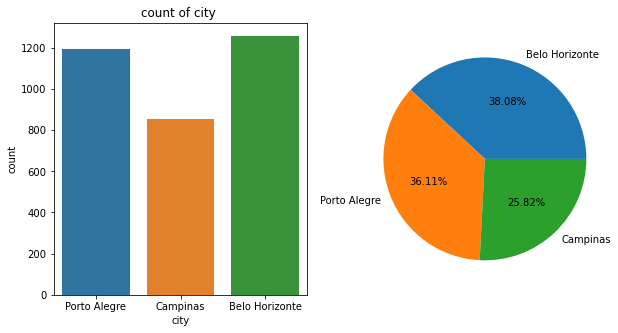

In [21]:
#city column
fig,ax=plt.subplots(1,2,figsize=(10,5))
ax[0].set_title("count of city ")
data=df11['city'].value_counts()
print(data)
label=data.keys()
sns.countplot(x=df11['city'],ax=ax[0])
plt.pie(x=data,labels=label,autopct="%0.2f%%")
plt.show()

not furnished    2697
furnished         607
Name: furniture, dtype: int64


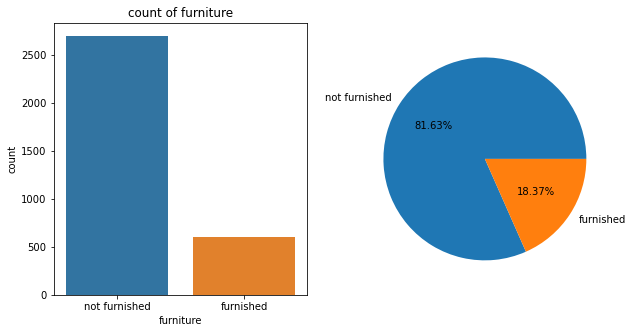

In [22]:
#furniture column
fig,ax=plt.subplots(1,2,figsize=(10,5))
ax[0].set_title("count of furniture")
data=df11['furniture'].value_counts()
print(data)
label=data.keys()
sns.countplot(x=df11['furniture'],ax=ax[0])
plt.pie(x=data,labels=label,autopct="%0.2f%%")
plt.show()

acept        2629
not acept     675
Name: animal, dtype: int64


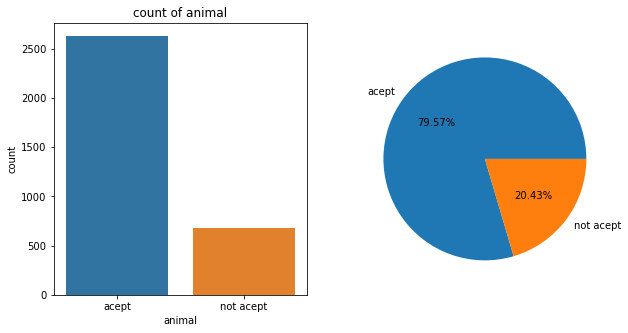

In [23]:
#animal column
fig,ax=plt.subplots(1,2,figsize=(10,5))
ax[0].set_title("count of animal")
data=df11['animal'].value_counts()
print(data)
label=data.keys()
sns.countplot(x=df11['animal'],ax=ax[0])
plt.pie(x=data,labels=label,autopct="%0.2f%%")
plt.show()

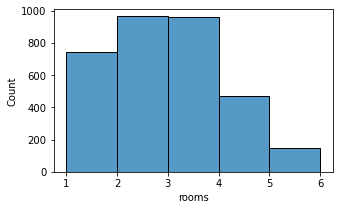

In [24]:
#rooms column
fig,ax=plt.subplots(figsize=(5,3))
bins=[1,2,3,4,5,6]
sns.histplot(x=df11['rooms'],bins=bins)
plt.show()

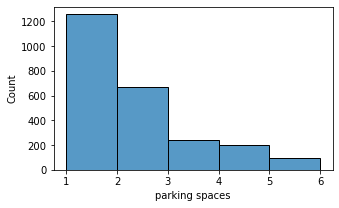

In [25]:
#parking spaces column
fig,ax=plt.subplots(figsize=(5,3))
bins=[1,2,3,4,5,6]
sns.histplot(x=df11['parking spaces'],bins=bins)
plt.show()

# BIVARIATE ANALYSIS FOR BACHELORS

In [26]:
df_bachelors=df11[(df11['rooms']<=2) &  (df11['bathroom']==1)]

In [27]:
df_bachelors

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
11,Campinas,46,1,1,1,10,acept,not furnished,550,580,43,8,1181
21,Belo Horizonte,42,1,1,1,17,not acept,furnished,470,2690,172,36,3368
35,Porto Alegre,38,1,1,2,11,not acept,not furnished,450,1750,0,26,2226
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10648,Belo Horizonte,80,2,1,1,3,not acept,not furnished,240,1200,67,16,1523
10665,Belo Horizonte,55,2,1,1,2,not acept,furnished,200,1600,75,22,1897
10667,Belo Horizonte,75,2,1,1,3,not acept,not furnished,180,1250,0,17,1447
10676,Porto Alegre,40,1,1,0,1,acept,not furnished,330,1200,159,18,1707


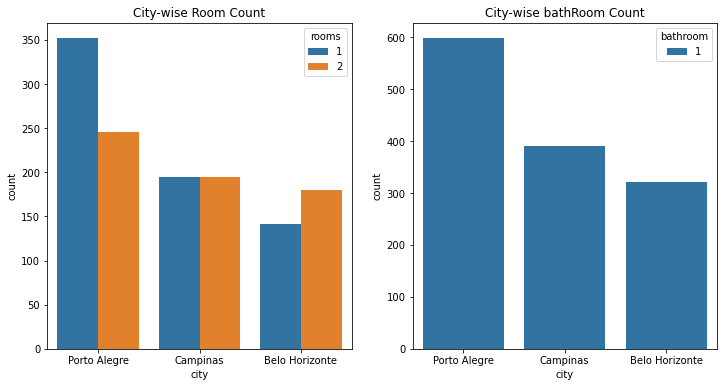

In [57]:
#relation between citi,rooms,bathrooms for bachelors
fig,ax=plt.subplots(1,2,figsize=(12,6))
sns.countplot(x='city',hue='rooms',data=df_bachelors,ax=ax[0])
ax[0].set_title('City-wise Room Count')
sns.countplot(x='city',hue='bathroom',data=df_bachelors)
ax[1].set_title('City-wise bathRoom Count')
plt.show()

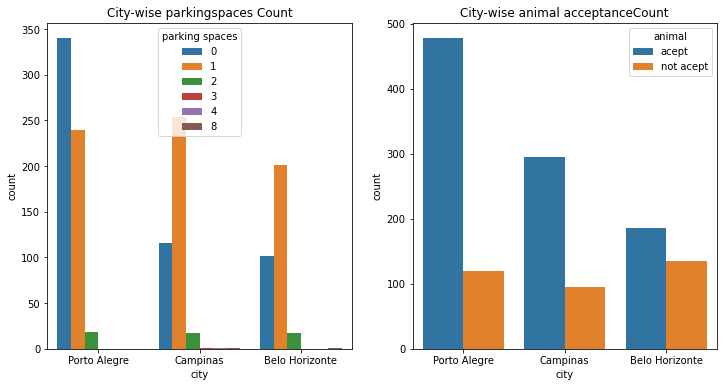

In [58]:
#relation between city  , parking spaces and animal acceptance
fig,ax=plt.subplots(1,2,figsize=(12,6))
sns.countplot(x='city',hue='parking spaces',data=df_bachelors,ax=ax[0])
ax[0].set_title('City-wise parkingspaces Count')
sns.countplot(x='city',hue='animal',data=df_bachelors)
ax[1].set_title('City-wise animal acceptanceCount')
plt.show()

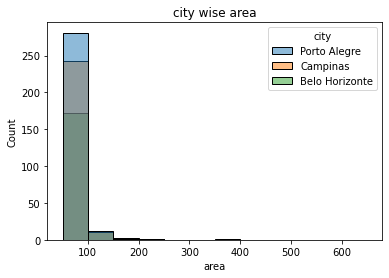

In [61]:
#relation between city and area 
bins=[50,100,150,200,250,300,350,400,450,500,600,650]
sns.histplot(x='area',hue='city',data=df_bachelors,bins=bins)
plt.title('city wise area')
plt.show()

INTERPRETATION-The area in the porto alegre city is smaller and it is below 100 so it is the best option for the bachelors

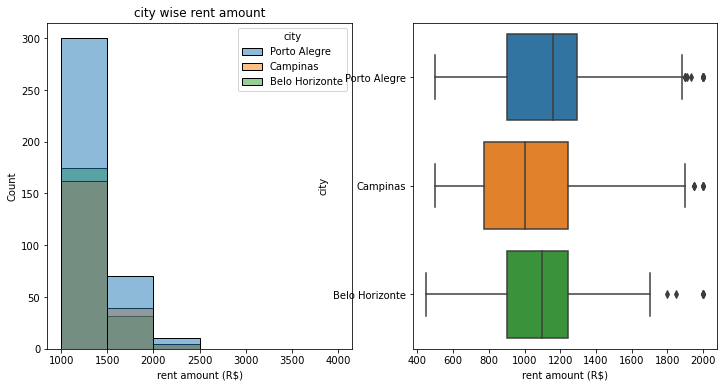

In [64]:
#relation between city and rent amount
fig,ax=plt.subplots(1,2,figsize=(12,6))
bins=[1000,1500,2000,2500,3000,3500,4000]
sns.histplot(x='rent amount (R$)',hue='city',data=df_bachelors,bins=bins,ax=ax[0])
ax[0].set_title("city wise rent amount")
sns.boxplot(x='rent amount (R$)',y='city',data=df_bachelors)

plt.show()

In [59]:
#OUTLIER TREATMENT
mean = df_bachelors['rent amount (R$)'].mean()
x = df_bachelors[(df['rent amount (R$)'] > 2000)].index
x

Int64Index([    2,    21,    39,    73,    76,   108,   187,   238,   244,
              334,
            ...
            10278, 10290, 10294, 10306, 10316, 10431, 10486, 10551, 10619,
            10623],
           dtype='int64', length=138)

In [33]:
for index in x:
    df_bachelors.loc[index, "rent amount (R$)"] = mean

In [34]:
#central tendency,measures of dispersion for rent amount
pivot_table = pd.pivot_table(df_bachelors, values='rent amount (R$)', index='city', aggfunc=['mean', 'median','std'])

In [35]:
pivot_table

,mean,median,std
,rent amount (R$),rent amount (R$),rent amount (R$)
city,,,
Belo Horizonte,1092.593949,1100.0,289.229127
Campinas,1036.891718,1000.0,342.731177
Porto Alegre,1127.940130,1156.5,321.154575


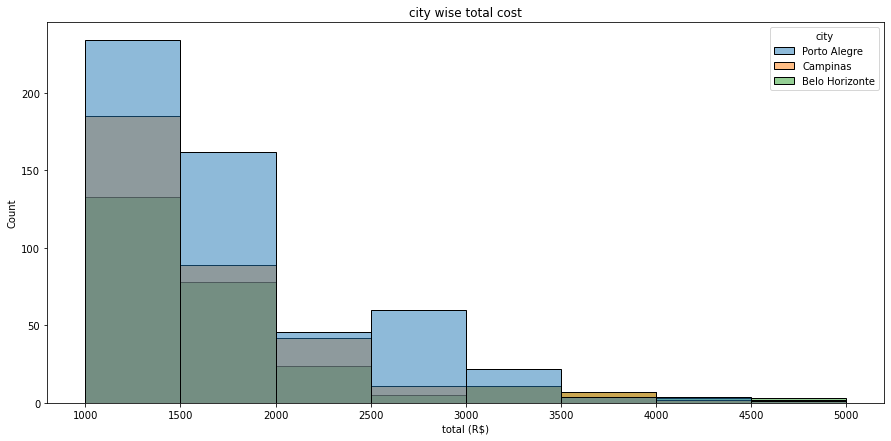

In [65]:
fig, ax = plt.subplots(figsize = (15, 7))
bins=[1000,1500,2000,2500,3000,3500,4000,4500,5000]
sns.histplot(x = "total (R$)", hue = "city", bins=bins,data=df_bachelors)
plt.title('city wise total cost')
plt.show()

# Porto Alegre city has a relatively low total cost of living compared to other cities in Brazil. Additionally, it has a high number of properties with a smaller area and 1 or 2 rooms, along with 1 parking space, making it suitable for bachelors. The city also has a higher acceptance rate for pets, which could be an important consideration for those who have pets. Therefore, Porto Alegre city is the best option for bachelors

# BIVARIATE AND MULTIVARIATE  ANALYSIS FOR MID-SIZED FAMILIES

In [37]:
df_midsized=df11[(df11['rooms']<=3) & (df11['rooms']>=2)& (df11['bathroom']==2)
                 &(df11['parking spaces']==2)]

In [38]:
df_midsized

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
85,Belo Horizonte,75,2,2,2,14,not acept,not furnished,620,2500,264,34,3418
101,Porto Alegre,67,3,2,2,4,acept,not furnished,600,2200,50,33,2883
113,Campinas,80,2,2,2,11,acept,not furnished,832,2200,171,28,3231
122,Belo Horizonte,100,3,2,2,2,acept,not furnished,340,1600,183,22,2145
179,Belo Horizonte,90,2,2,2,3,acept,not furnished,200,2000,84,27,2311
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10614,Campinas,67,2,2,2,12,acept,not furnished,800,1030,84,14,1928
10629,Campinas,83,2,2,2,1,acept,furnished,800,3700,234,47,4781
10635,Porto Alegre,100,3,2,2,2,acept,furnished,900,2455,125,36,3516
10651,Belo Horizonte,95,3,2,2,7,acept,not furnished,525,3100,219,42,3886


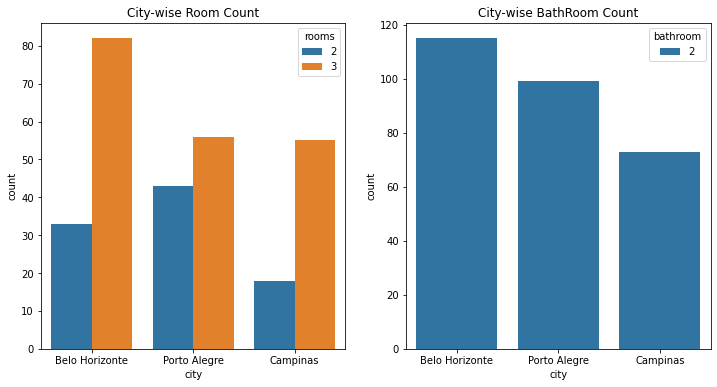

In [67]:
#relation between citi,rooms,bathrooms for mid-sized families
fig,ax=plt.subplots(1,2,figsize=(12,6))
sns.countplot(x='city',hue='rooms',data=df_midsized,ax=ax[0])
ax[0].set_title('City-wise Room Count')
sns.countplot(x='city',hue='bathroom',data=df_midsized)
ax[1].set_title('City-wise BathRoom Count')
plt.show()

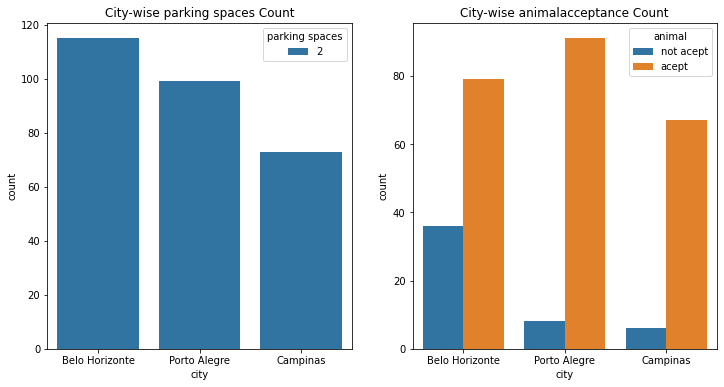

In [68]:
fig,ax=plt.subplots(1,2,figsize=(12,6))
sns.countplot(x='city',hue='parking spaces',data=df_midsized,ax=ax[0])
ax[0].set_title('City-wise parking spaces Count')
sns.countplot(x='city',hue='animal',data=df_midsized)
ax[1].set_title('City-wise animalacceptance Count')
plt.show()

INTERPRETATION-Belo Horizonte has properties with 2 parking spaces and a high acceptance of pets, making it suitable for mid-sized families who have pets.

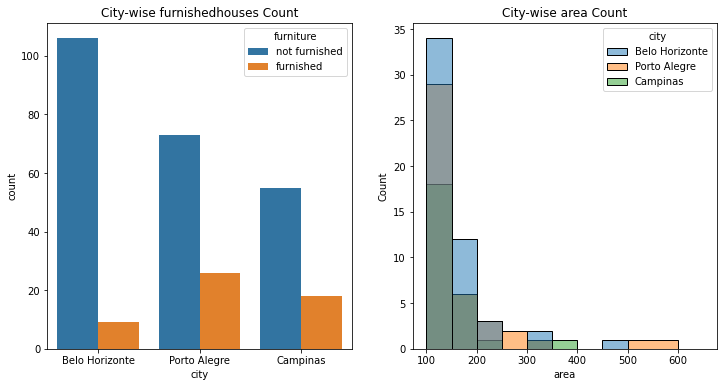

In [69]:
#relation between city and area,furnished
fig,ax=plt.subplots(1,2,figsize=(12,6))
sns.countplot(x='city',hue='furniture',data=df_midsized,ax=ax[0])
ax[0].set_title('City-wise furnishedhouses Count')
bins=[100,150,200,250,300,350,400,450,500,600,650]
sns.histplot(x='area',hue='city',data=df_midsized,bins=bins)
ax[1].set_title('City-wise area Count')
plt.show()

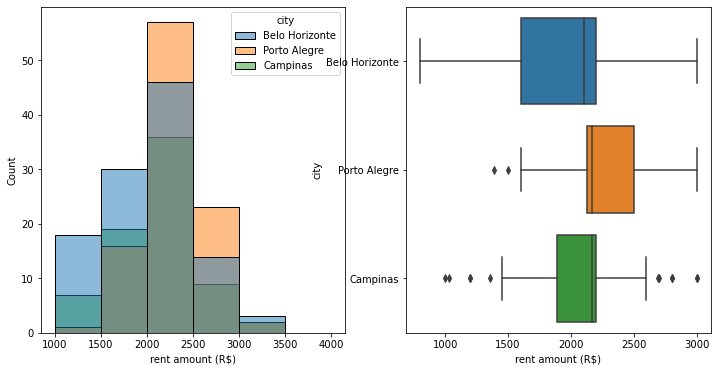

In [72]:
#relation between city and rent amount
fig,ax=plt.subplots(1,2,figsize=(12,6))
bins=[1000,1500,2000,2500,3000,3500,4000]
sns.histplot(x='rent amount (R$)',hue='city',data=df_midsized,bins=bins,ax=ax[0])
sns.boxplot(x='rent amount (R$)',y='city',data=df_midsized)
plt.show()

In [70]:
#OUTLIER TREATMENT
mean = df_midsized['rent amount (R$)'].mean()
x = df_midsized[(df['rent amount (R$)'] > 3000)].index
x

Int64Index([  196,   345,   424,   569,   609,   714,  1340,  1784,  1785,
             1802,  2063,  2689,  2783,  2888,  2889,  2926,  3265,  3315,
             3415,  3657,  3680,  3695,  4053,  4207,  4324,  4333,  4405,
             4422,  4613,  4644,  4657,  4724,  4867,  5210,  5213,  5227,
             5235,  5244,  5416,  5714,  5810,  6424,  6951,  7144,  7244,
             7268,  7404,  7561,  8121,  8270,  8466,  8480,  8641,  8814,
             8850,  9729,  9792,  9927, 10060, 10088, 10104, 10323, 10582,
            10601, 10629, 10651],
           dtype='int64')

In [71]:
for index in x:
    df_midsized.loc[index, "rent amount (R$)"] = mean

In [45]:
#central tendency,measures of dispersion for rent amount
pivot_table = pd.pivot_table(df_midsized, values='rent amount (R$)', index='city', aggfunc=['mean', 'median','std'])

In [46]:
pivot_table

,mean,median,std
,rent amount (R$),rent amount (R$),rent amount (R$)
city,,,
Belo Horizonte,2022.065051,2100.0,555.084651
Campinas,2121.424801,2200.0,466.211728
Porto Alegre,2371.579101,2500.0,379.307129


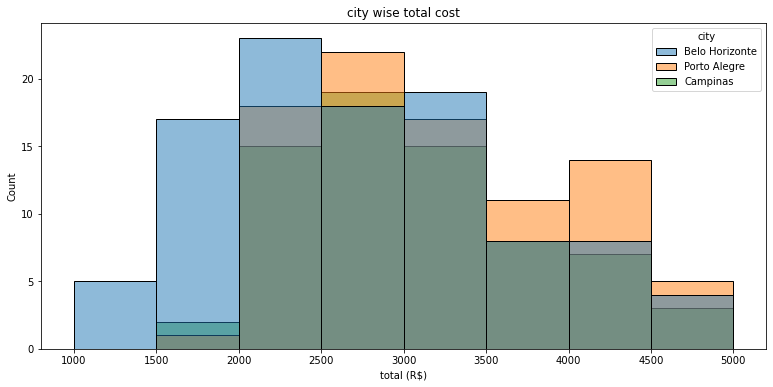

In [73]:
fig, ax = plt.subplots(figsize = (13, 6))
bins=[1000,1500,2000,2500,3000,3500,4000,4500,5000]
sns.histplot(x = "total (R$)", hue = "city", bins=bins,data=df_midsized)
plt.title('city wise total cost')
plt.show()

# Belo Horizonte city is an best option for mid-sized families as it has a high number of properties with 3 bedrooms and 2 bathrooms. These properties have an area ranging between 100 to 200 square meters and a total cost ranging between 2000 to 3500, which is an affordable price range for mid-sized families. The city also has a good acceptance rate for pets, which could be an important consideration for those who have pets. Therefore, Belo Horizonte city is the best option for mid-sized families .

# BIVARIATE AND MULTIVARIATE ANALYSIS FOR LARGE-SIZED FAMILIES

In [48]:
df_largesized=df11[(df11['rooms']>=4) &  (df11['bathroom']>=3) &  (df11['parking spaces']>=3)
                   & (df11['furniture']=='furnished')]

In [49]:
df_largesized

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
15,Campinas,330,4,6,6,0,acept,furnished,680,8000,328,121,9129
91,Porto Alegre,350,4,4,4,0,acept,furnished,1,9000,359,160,9520
241,Belo Horizonte,570,5,6,7,0,acept,furnished,0,8330,873,137,9340
346,Belo Horizonte,204,4,4,4,22,not acept,furnished,2701,10000,760,134,13600
538,Belo Horizonte,428,5,5,4,0,acept,furnished,0,9600,667,158,10430
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9888,Belo Horizonte,802,6,6,8,0,acept,furnished,0,15000,1003,246,16250
9909,Belo Horizonte,260,4,3,3,4,acept,furnished,2650,3300,555,44,6549
9989,Campinas,295,7,6,4,0,not acept,furnished,0,6200,334,94,6628
10172,Belo Horizonte,260,4,4,6,10,acept,furnished,3200,11900,12500,159,27760


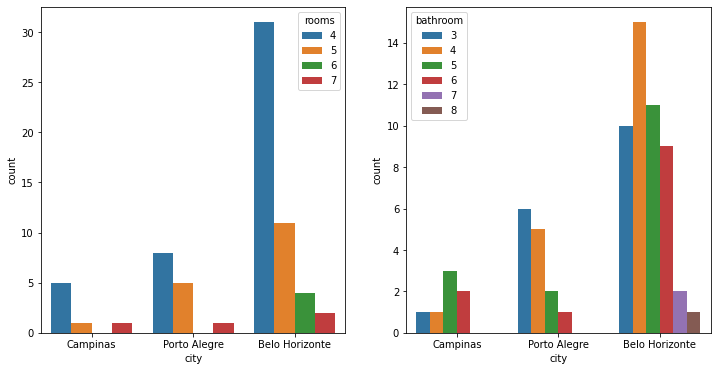

In [50]:
#relation between city,rooms,bathrooms for large-sized families
fig,ax=plt.subplots(1,2,figsize=(12,6))
sns.countplot(x='city',hue='rooms',data=df_largesized,ax=ax[0])
sns.countplot(x='city',hue='bathroom',data=df_largesized)
plt.show()

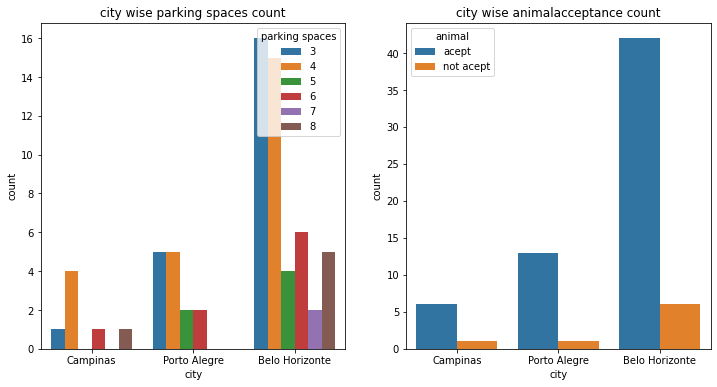

In [74]:
#relation between city,parking spaces,animal for large-sized families
fig,ax=plt.subplots(1,2,figsize=(12,6))
sns.countplot(x='city',hue='parking spaces',data=df_largesized,ax=ax[0])
ax[0].set_title('city wise parking spaces count')
sns.countplot(x='city',hue='animal',data=df_largesized)
ax[1].set_title('city wise animalacceptance count')
plt.show()

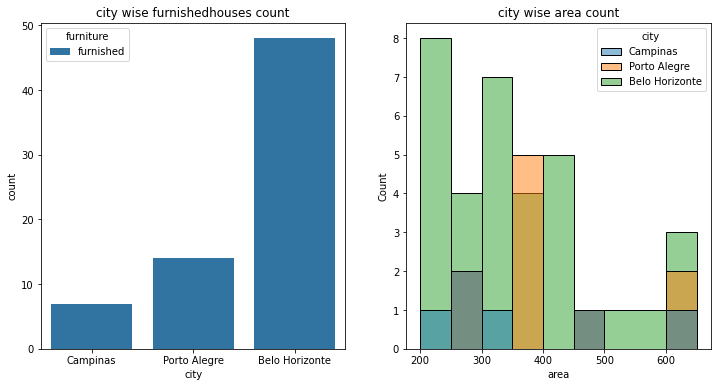

In [75]:
#relation between city and area,furnished
fig,ax=plt.subplots(1,2,figsize=(12,6))
sns.countplot(x='city',hue='furniture',data=df_largesized,ax=ax[0])
ax[0].set_title('city wise furnishedhouses count')
bins=[200,250,300,350,400,450,500,600,650]
sns.histplot(x='area',hue='city',data=df_largesized,bins=bins)
ax[1].set_title('city wise area count')
plt.show()

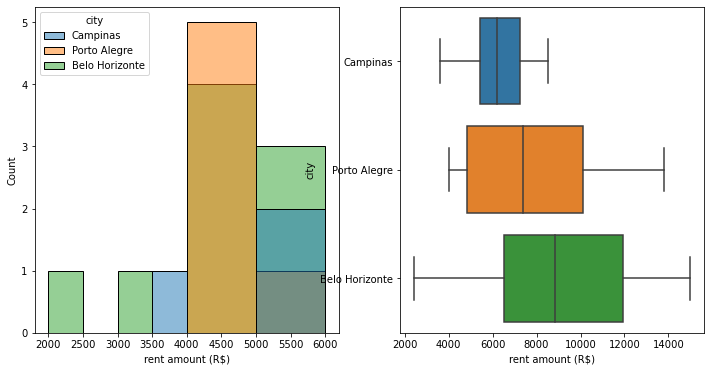

In [53]:
#relation between city and rent amount FOR LARGE SIZED FAMILIES
fig,ax=plt.subplots(1,2,figsize=(12,6))
bins=[2000,2500,3000,3500,4000,5000,6000]
sns.histplot(x='rent amount (R$)',hue='city',data=df_largesized,bins=bins,ax=ax[0])
sns.boxplot(x='rent amount (R$)',y='city',data=df_largesized)
plt.show()

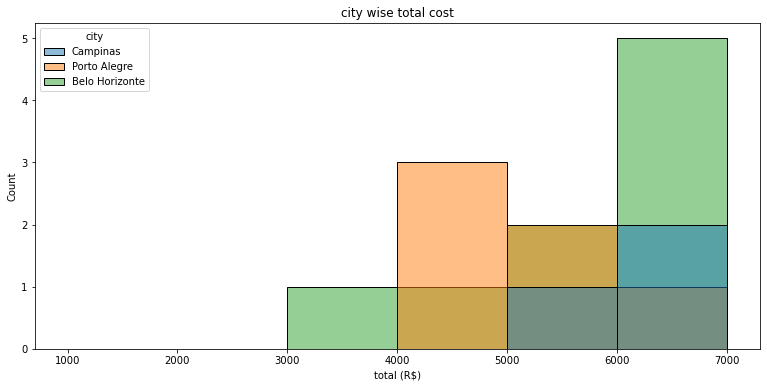

In [76]:
fig, ax = plt.subplots(figsize = (13, 6))
bins=[1000,2000,3000,4000,5000,6000,7000]
sns.histplot(x = "total (R$)", hue = "city", bins=bins,data=df_largesized)
plt.title('city wise total cost')
plt.show()

In [55]:
INTERPRETATION-The total cost of living in Belo Horizonton city is in between 6000 and 7000.

SyntaxError: invalid syntax (Temp/ipykernel_7740/4038786487.py, line 1)

# Belo Horizonte city is an best option for large-sized families as it has a high number of properties with morethan 4 bedrooms and 3 bathrooms. And also this city high number of furnished houses.These properties have an area ranging between 250 to 600 square meters and a total cost ranging between 6000 to 7000, which is an affordable price range for large-sized families. The city also has a good acceptance rate for pets, which could be an important consideration for those who have pets. Therefore, Belo Horizonte city is the best option for large-sized families